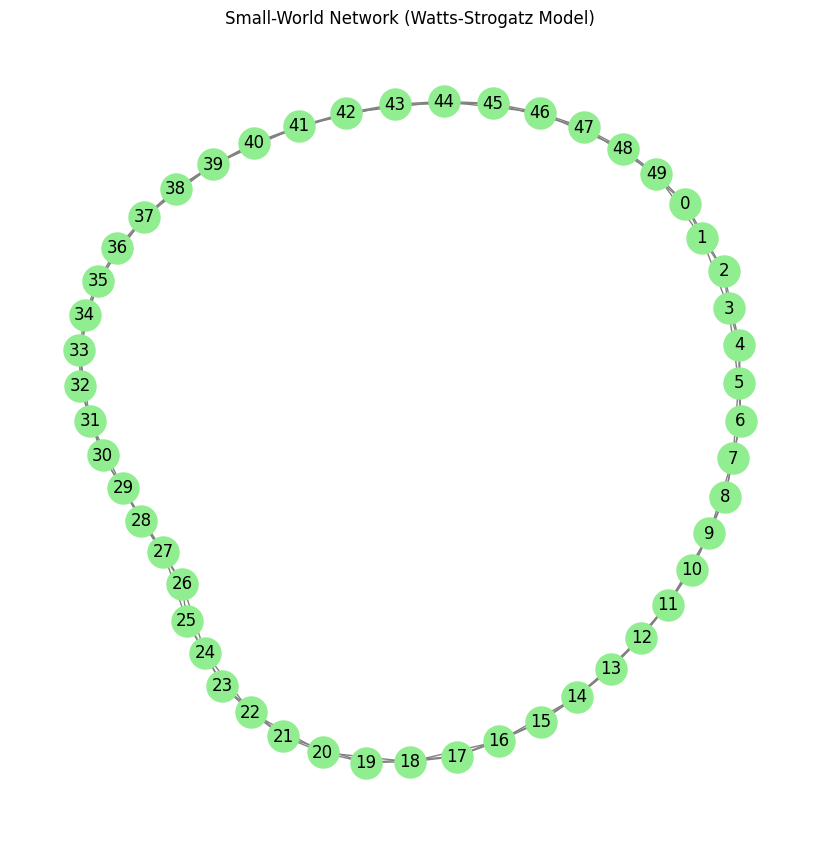

Clustering Coefficient: 0.50
Average Shortest Path Length: 6.63
Adjacency Matrix:
[[0 1 1 ... 0 1 1]
 [1 0 1 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 1 1 0]]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(45)  
np.random.seed(45)  


# Parameters for the Watts-Strogatz model
n = 50  # Number of nodes
k = 4 # Each node is connected to k nearest neighbors IF in a rinG
p = 0 # The probability of rewiring each edge

# Create a small-world network 
small_world = nx.watts_strogatz_graph(n, k, p)


plt.figure(figsize=(8, 8))
nx.draw(small_world, with_labels=True, node_color="lightgreen", node_size=500, edge_color="gray")
plt.title("Small-World Network (Watts-Strogatz Model)")
plt.show()

# PROPERTIES of the network
clustering_coefficient = nx.average_clustering(small_world)
average_shortest_path_length = nx.average_shortest_path_length(small_world)

print(f"Clustering Coefficient: {clustering_coefficient:.2f}")
print(f"Average Shortest Path Length: {average_shortest_path_length:.2f}")

# the adjacency matrix
adj_reg = nx.adjacency_matrix(small_world).todense()

print("Adjacency Matrix:")
print(np.array(adj_reg))


In [ ]:
def func(x, y, alpha):
    if x <= 0:
        f1 = (alpha / (1 - x)) + y
        return f1
    
    elif 0< x < alpha + y:
        f2 = alpha + y
        return f2
    
    else:  # x >= alpha + y 
        f3 = -1
        return f3




def step_pulse(I0, I_pulse, t_start, duration, T, n_pulses, interval):
    #Generates a step pulse current array
    #     I0 (float) Initial current
    #     I_pulse (float) Amplitude of the pulse
    #     t_start (int) Start time of the first pulse
    #     duration (int) Duration of each pulse
    #     T (int) Total time steps
    #     n_pulses (int Number of pulses
    #     interval (int) Time between the end of one pulse and the start of the next
    # Returns:
    #     numpy rray of current values over time
    

    t = np.arange(0, T)
    current = np.full_like(t, I0, dtype=float)
    for i in range(n_pulses):
        pulse_start = t_start + i * (duration + interval)
        pulse_end = pulse_start + duration
        current[(t >= pulse_start) & (t <= pulse_end)] = I_pulse
    return current



def coupled_rulkov_curr(N, T, mu, alpha, sigma, coupling_const, adja_matrix, pulse_current, pulse_nodes
                        ):

    # Simulating the coupled Rulkov model with step pulse current applied to random nodes
    #N (int): Number of nodes
    #     T (int): Number of time steps
    #     mu, alpha, sigma (float) model parameters.
    #     adja_matrix (numpy.ndarray): Adjacency matrix
    #     I0, I_pulse, t_start, duration, n_pulses, interval (float) pulse parameters
    #     num_pulse_nodes (int): Number of nodes receiving the pulse.
    # Returns: (xlist, ylist): states of nodes over time.

    # Initialize x and y values
    x_init = -1.01
    y_init = -3

    xlist = np.zeros((T, N))
    ylist = np.zeros((T, N))

    # Initializing
    xlist[0, :] = x_init
    ylist[0, :] = y_init



    for t in range(1, T):
        for i in range(N):
            # Calculate coupling term
            coupling_term = coupling_const * sum(
                adja_matrix[i, j] * (xlist[t-1, j] - xlist[t-1, i]) for j in range(N)
            )

            # Determine if the current pulse applies to this node
            external_current = pulse_current[t] if i == pulse_nodes else 0

            # Update x and y for node i
            xlist[t, i] = func(xlist[t-1, i], ylist[t-1, i], alpha) + coupling_term
            ylist[t, i] = ylist[t-1, i] - mu * (xlist[t-1, i] + 1) + mu * (sigma + external_current)

    return xlist, ylist


In [3]:
T = 30000
N = n
sigma = -0.01
mu  = 0.001
adja_matrix = adj_reg
alpha = 4
# coupling_const = 0.0004
I0 = 0
I_pulse = 1
t_start = 0
duration = T
n_pulses = 1
interval = 0
num_pulse_nodes = 1


pulse_current = step_pulse(I0, I_pulse, t_start, duration, T, n_pulses, interval)
pulse_nodes = 25
# pulse_nodes = np.random.choice(N, num_pulse_nodes, replace=False)
# xlri, ylri =  coupled_rulkov_curr(n, T, mu, alpha, sigma, coupling_const, adja_matrix,pulse_current, pulse_nodes)    




0


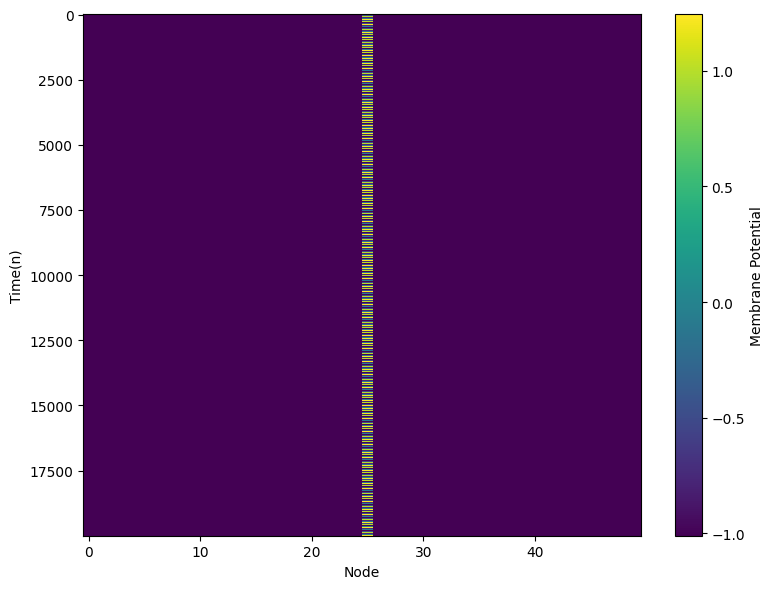

0.001


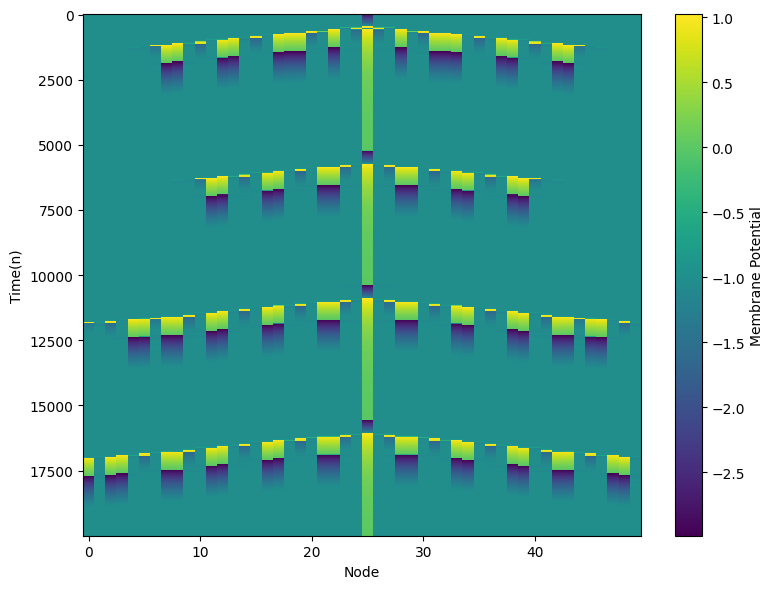

0.002


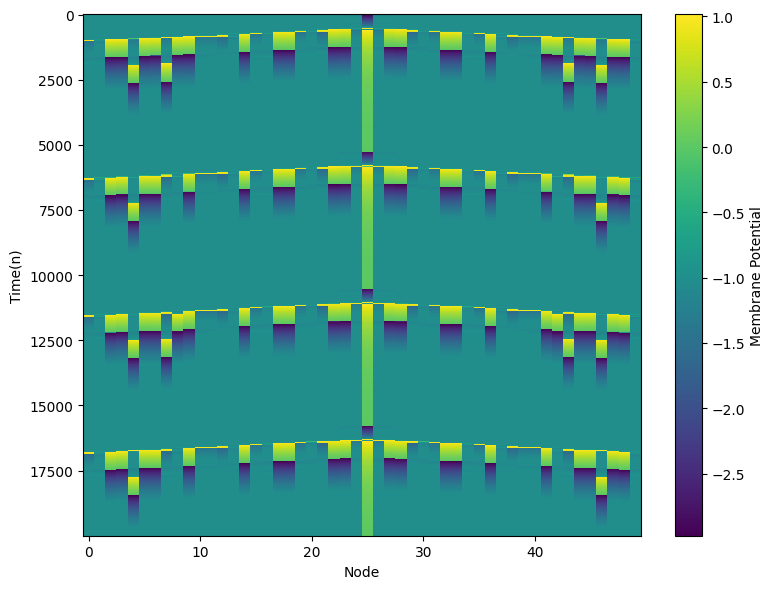

0.003


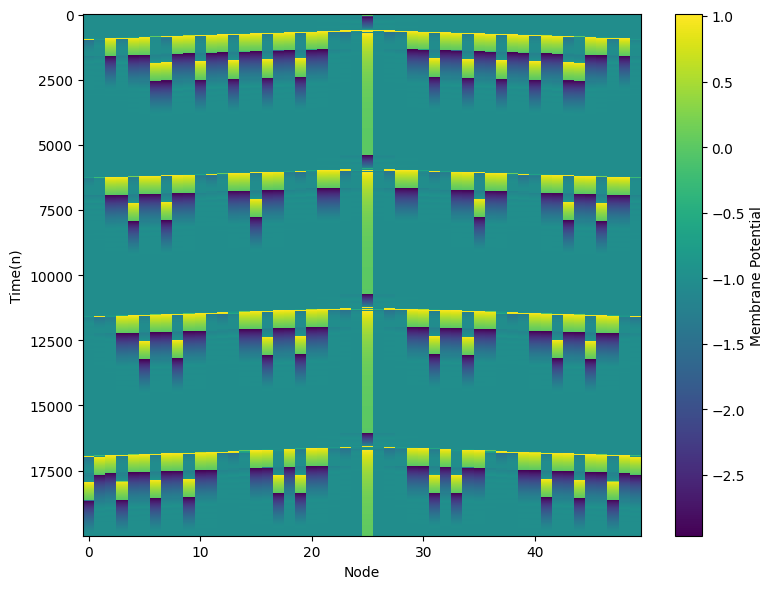

0.004


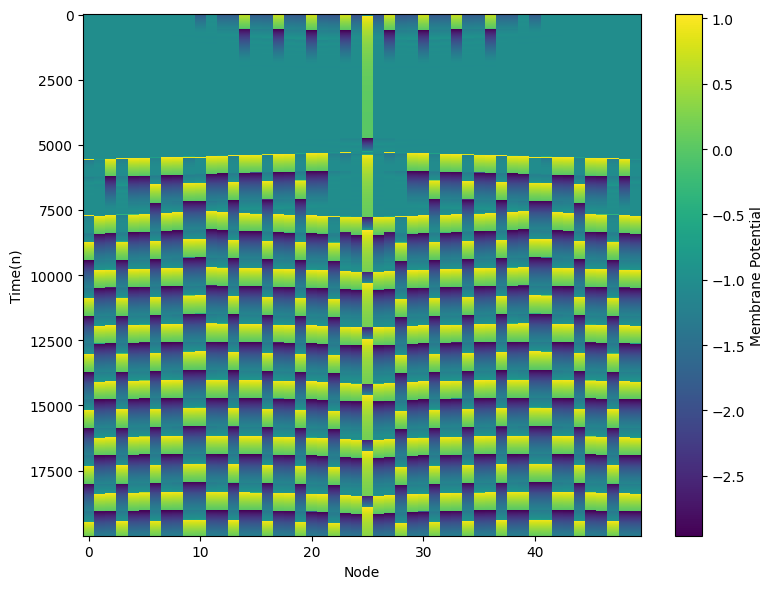

0.005


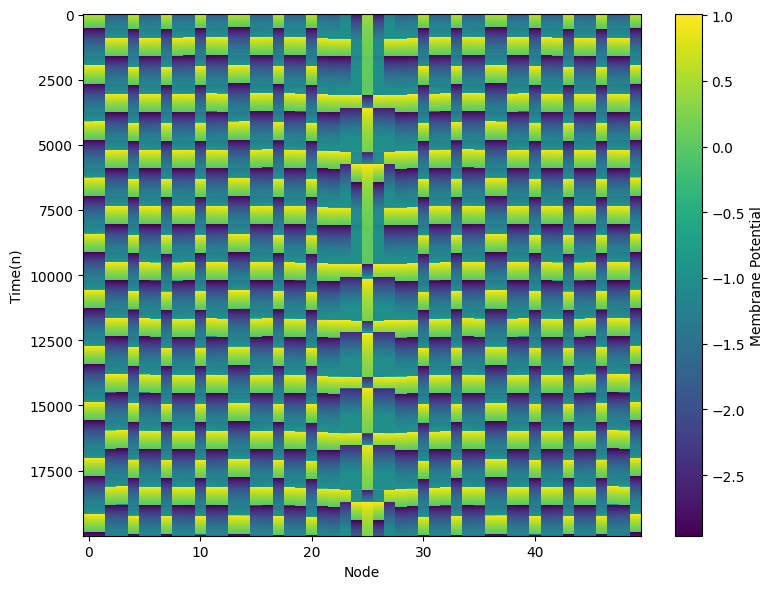

0.006


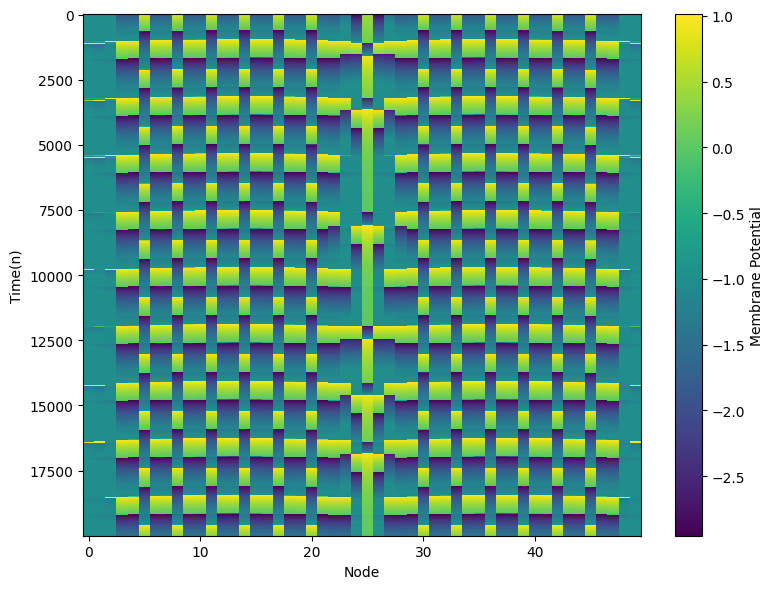

0.007


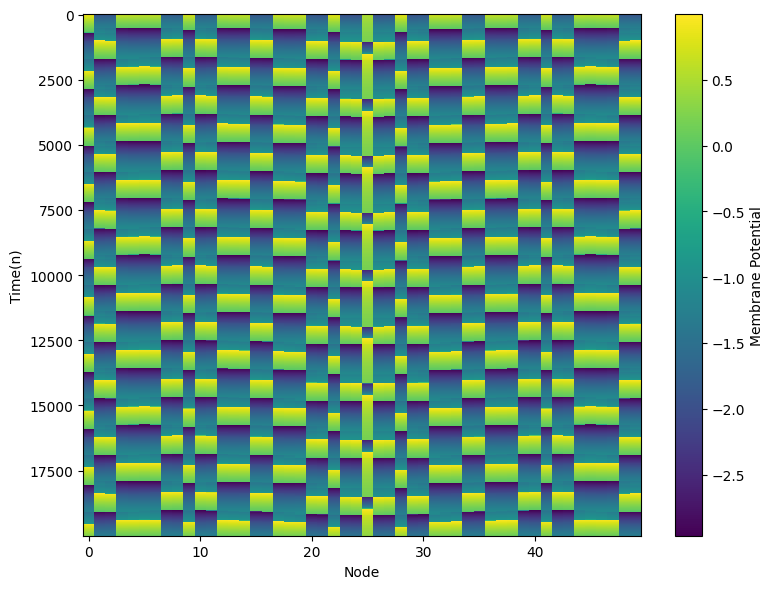

0.008


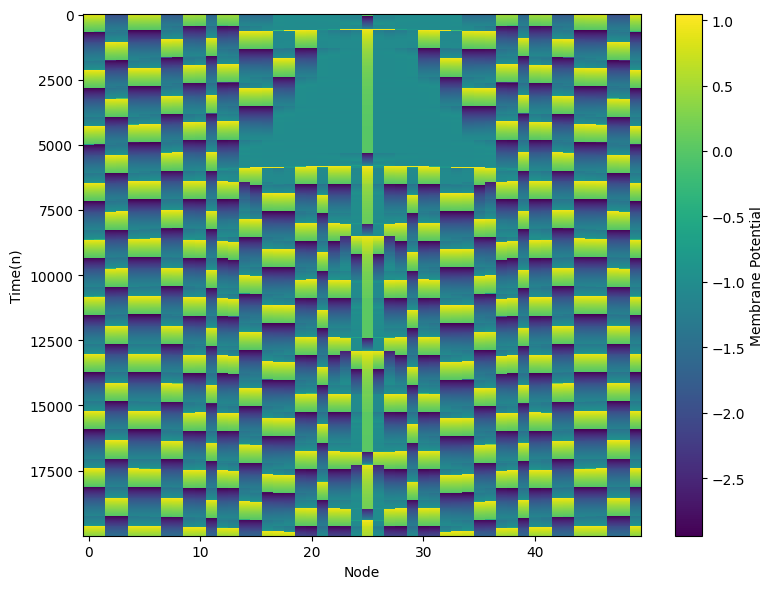

0.009


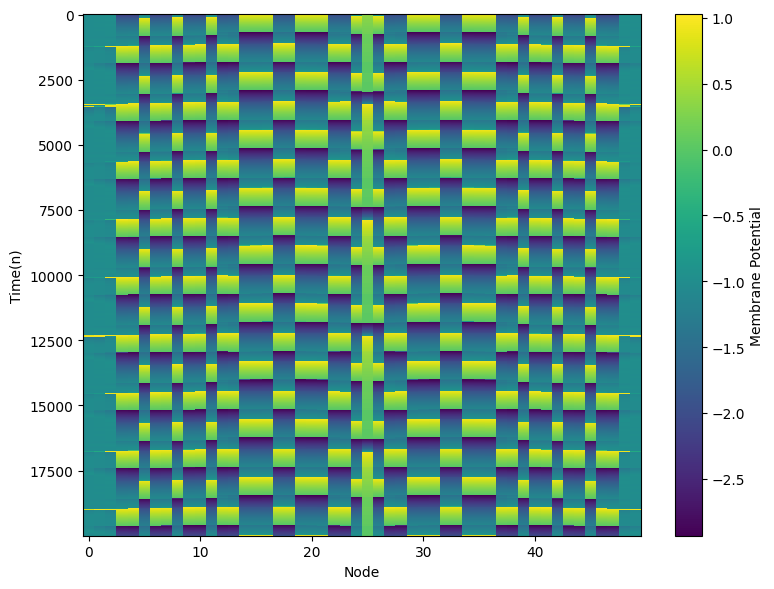

0.01


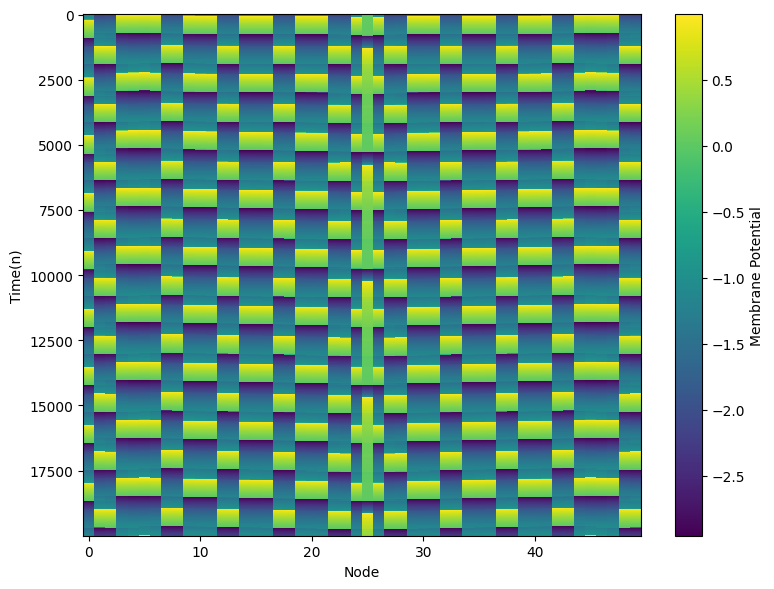

0.02


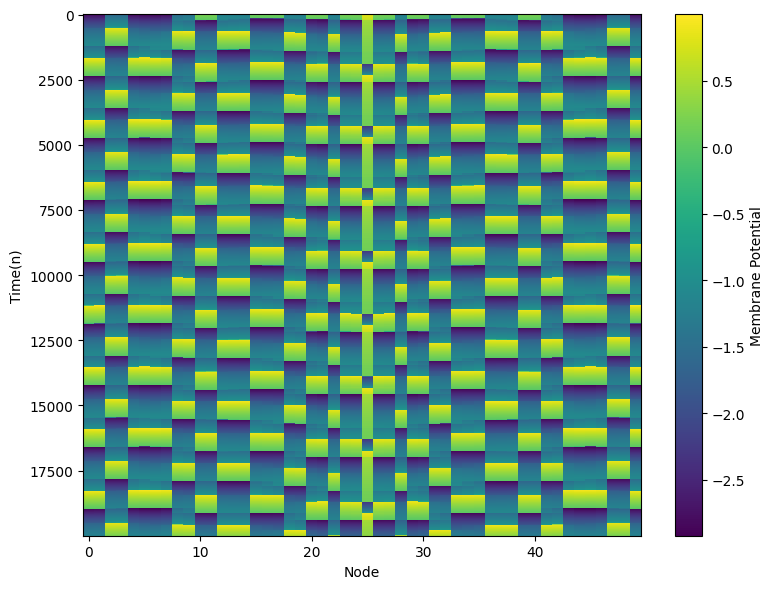

0.03


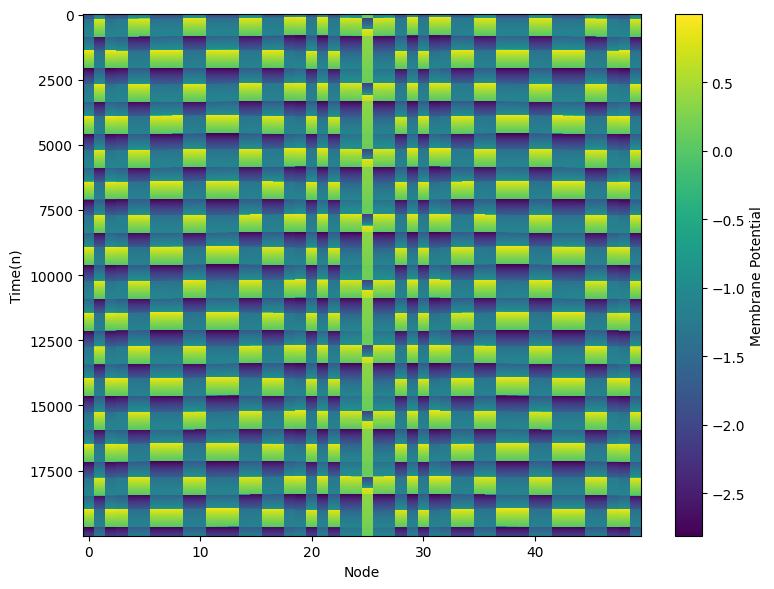

0.04


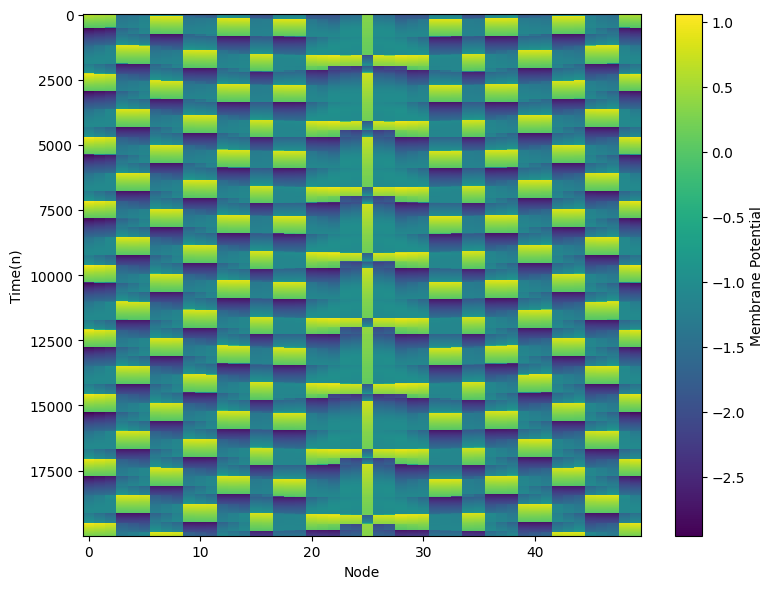

0.05


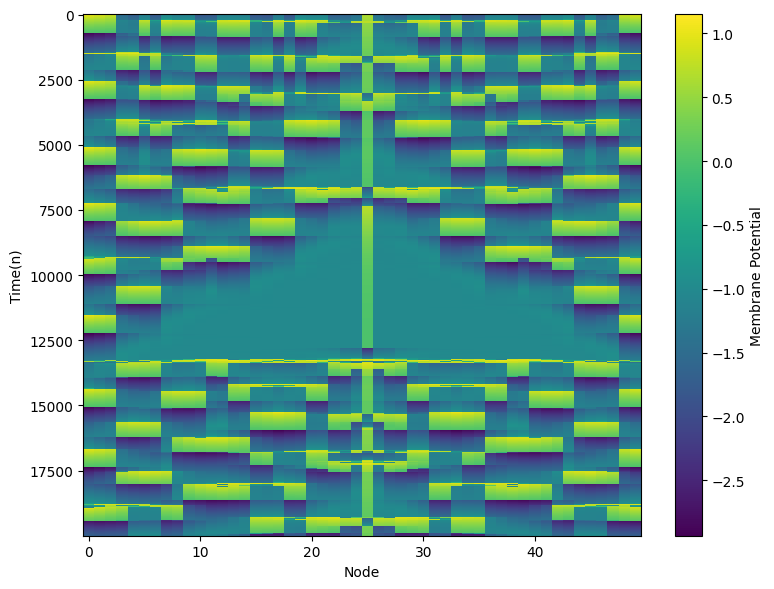

0.06


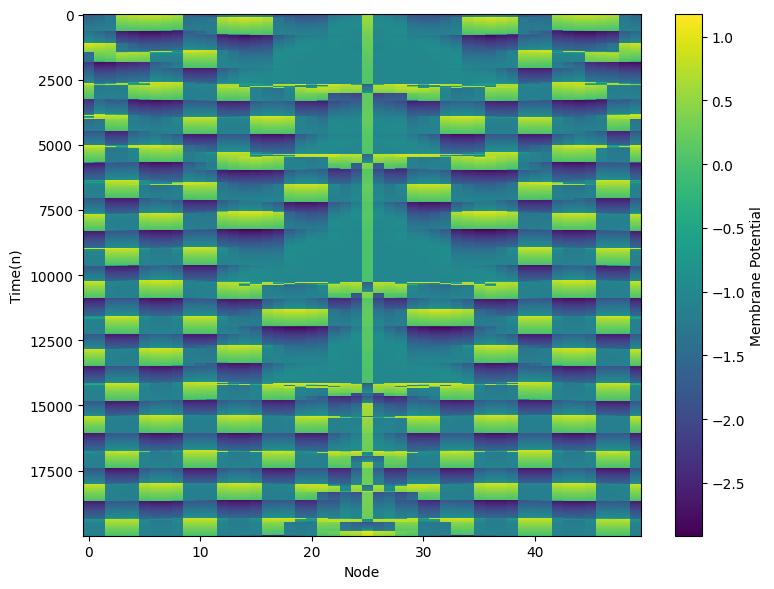

0.07


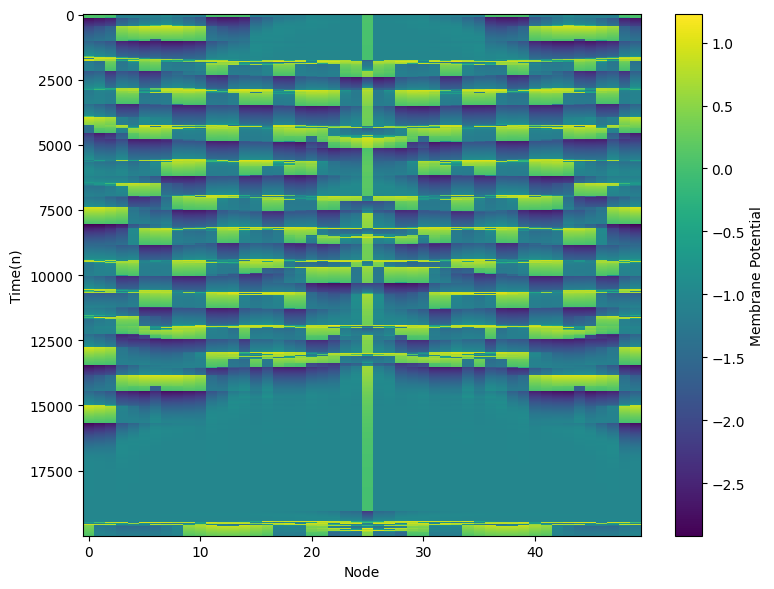

0.08


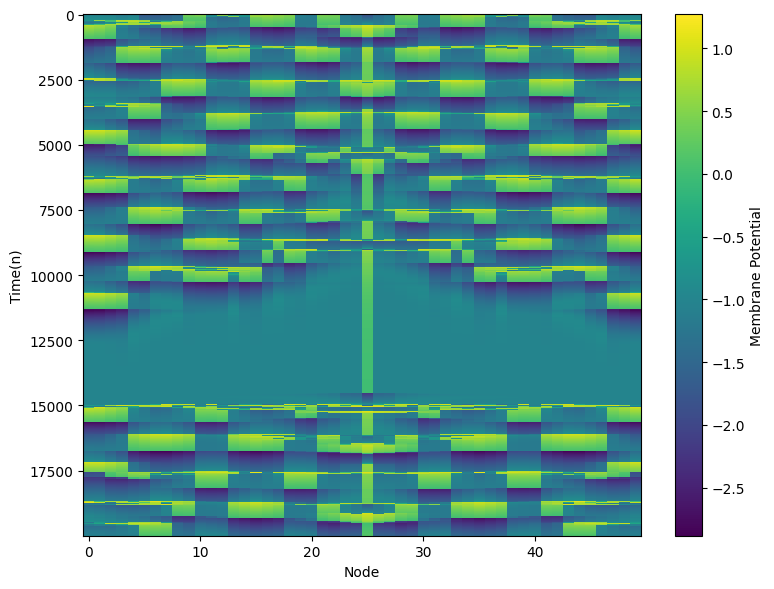

0.09


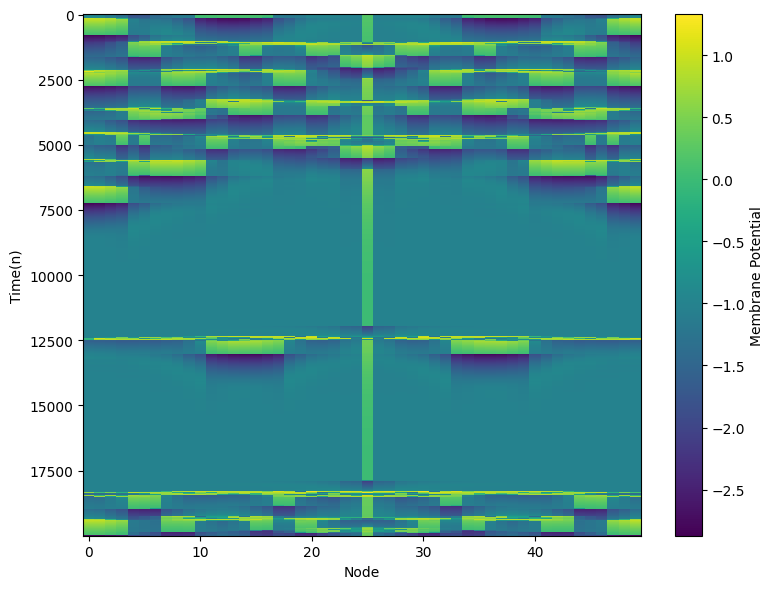

In [ ]:


cclist = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

# results = []  # List to store (cc, xlf, ylf) tuples

for cc in cclist:
    xlri, ylri =  coupled_rulkov_curr(n, T, mu, alpha, sigma, cc, adja_matrix,pulse_current, pulse_nodes)    
    # results.append((cc, xlri))  # Store the results
        
    plt.figure(figsize=(8, 6))
    plt.imshow(xlri[10000:, :], aspect='auto', cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Membrane Potential')

    plt.xlabel('Node')
    plt.ylabel('Time(n)')
    # plt.title(f'Regular Network, Coupling Constant = {cc}', pad=20)  # Adjust pad value as needed
    plt.tight_layout()
    print(cc)
    plt.show()




In [ ]:
import numpy as np

def x_metric(xlist):
    adjusted_xlist = np.abs(xlist + 1.01)  
    node_avg = np.mean(adjusted_xlist, axis=1)  # Step 3: Average over nodes
    final_metric = np.mean(node_avg)  # Step 4: Average over time
    return final_metric




Coupling Constant: 0, Metric: 0.019846353715060272
Coupling Constant: 0.001, Metric: 0.19112948960446988
Coupling Constant: 0.002, Metric: 0.24525016084833484
Coupling Constant: 0.003, Metric: 0.3480266870860624
Coupling Constant: 0.004, Metric: 0.7328537408078991
Coupling Constant: 0.005, Metric: 0.9102626842172292
Coupling Constant: 0.006, Metric: 0.8151147107648166
Coupling Constant: 0.007, Metric: 0.8655338367428408
Coupling Constant: 0.008, Metric: 0.7901458614265716
Coupling Constant: 0.009, Metric: 0.8203244459885898
Coupling Constant: 0.01, Metric: 0.9000592099200393
Coupling Constant: 0.02, Metric: 0.802039253643593
Coupling Constant: 0.03, Metric: 0.776074364402065
Coupling Constant: 0.04, Metric: 0.7451832559770815
Coupling Constant: 0.05, Metric: 0.6947452755479167
Coupling Constant: 0.06, Metric: 0.696154457938421
Coupling Constant: 0.07, Metric: 0.6102044207901297
Coupling Constant: 0.08, Metric: 0.6109183007092391
Coupling Constant: 0.09, Metric: 0.4490131857612528


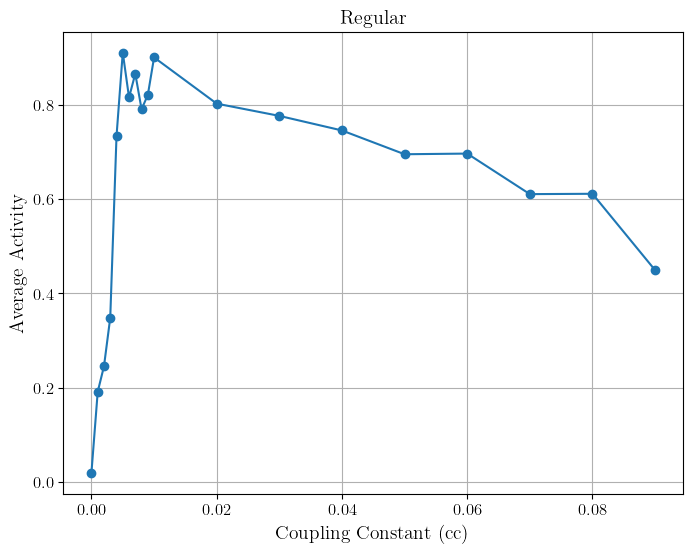

In [ ]:


# Apply x_metric to each stored xlf in results
metrics = [(cc, x_metric(xlri)) for cc, xlri in results]

# Print or analyze the results
for cc, metric in metrics:
    print(f"Coupling Constant: {cc}, Metric: {metric}")

# Extract cc values
cc_values = [cc for cc, _ in metrics]
metric_values = [metric for _, metric in metrics]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(cc_values, metric_values, marker='o', linestyle='-')

plt.xlabel("Coupling Strength")
plt.ylabel("Average Activity")
# plt.title("Regular")
plt.grid(True)

plt.show()
